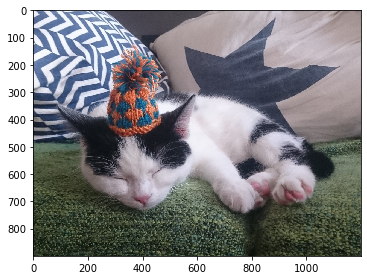

In [1]:
from skimage.io import imread, imshow, imsave
from matplotlib.pyplot import show
import numpy as np

image = imread('17157718_1475080609170139_6436185275063838511_o.jpg')[100:1000,400:1600]

patch_size = 50

def crop_image(image, patch_size):
    new_width = int(image.shape[1] / patch_size) * patch_size
    new_height = int(image.shape[0] / patch_size) * patch_size
    
    return image[:new_height, :new_width,...]

image = crop_image(image, patch_size)
imshow(image)

original = image.copy()

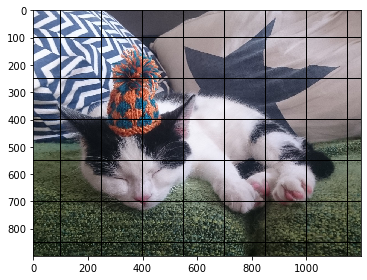

In [2]:

width = image.shape[1]
height = image.shape[0]
for x in range(int(width / patch_size)):
    image[:, x * patch_size] = 0
for y in range(int(height / patch_size)):
    image[y * patch_size] = 0
    
imshow(image)

In [3]:
start_x = int(width / 2 / patch_size)
start_y = int(height / 2 / patch_size)

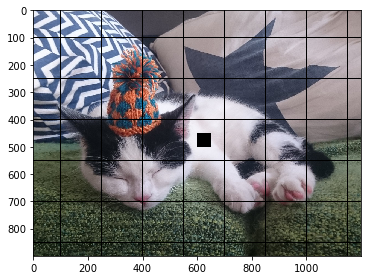

In [4]:
def set_tile_to_zero(image, x, y, patch_size):
    image[y*patch_size:(y+1)*patch_size, x*patch_size:(x+1)*patch_size] = 0
    
set_tile_to_zero(image, start_x, start_y, patch_size)
imshow(image)

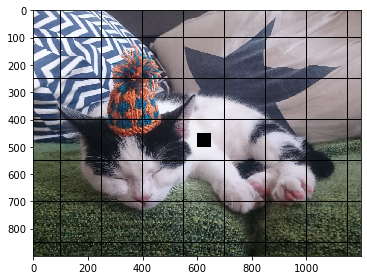

In [5]:
def exchange_tiles(image,x1,y1,x2,y2):
    tile1 = image[y1*patch_size:(y1+1)*patch_size, x2*patch_size:(x2+1)*patch_size].copy()
    tile2 = image[y2*patch_size:(y2+1)*patch_size, x1*patch_size:(x1+1)*patch_size].copy()
    
    image[y1*patch_size:(y1+1)*patch_size, x2*patch_size:(x2+1)*patch_size] = tile2
    image[y2*patch_size:(y2+1)*patch_size, x1*patch_size:(x1+1)*patch_size] = tile1

exchange_tiles(image, 1,2, 2,2)
imshow(image)

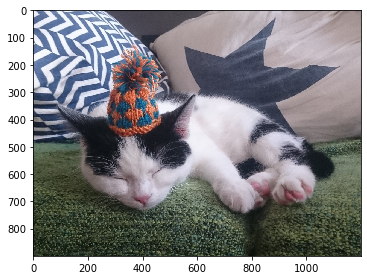

In [6]:
image = original
imshow(image)

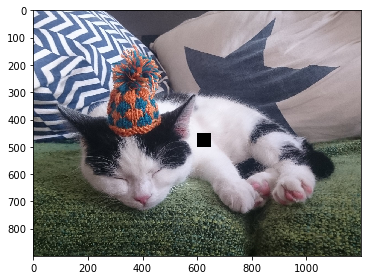

In [7]:
set_tile_to_zero(image, start_x, start_y, patch_size)
imshow(image)

In [8]:


game_chain = ['w','a','s', 'd']
game_state = 0

def new_pos(pos_x, pos_y, direction):
    if direction == 'w':
        pos_y -= 1
    elif direction == 'a':
        pos_x -= 1
    elif direction == 's':
        pos_y += 1
    elif direction == 'd':
        pos_x += 1
    
    return pos_x, pos_y

def run_game(image, game_chain, game_state, start_x, start_y):
    pos_x = start_x
    pos_y = start_y

    count = 0
    
    while (game_state != len(game_chain)):
        if game_state < 0:
            direction = game_chain[-1]
        else:
            direction = game_chain[game_state]

        print(direction)

        former_pos_x = pos_x
        former_pos_y = pos_y

        pos_x, pos_y = new_pos(pos_x, pos_y, direction)
        
        print(former_pos_x, former_pos_y, '->', pos_x, pos_y)

        exchange_tiles(image, former_pos_x, former_pos_y, pos_x, pos_y)

        if game_state == -1:
            game_state = len(game_chain)
        else:
            game_state += 1

        print(game_state)
        imshow(image)
        show()
        
        imsave("/Users/haase/temp/cat_" + str(count).zfill(3) + '.tif', image)
        count += 1

# run_game(original, game_chain, game_state, start_x, start_y)

In [9]:
def make_random_game(start_x, start_y, image, patch_size, length):
    directions=['w','a','s','d']
    width = image.shape[1] / patch_size
    height = image.shape[0] / patch_size
    
    path = []
    pos_x = start_x
    pos_y = start_y
    
    
    while len(path) < length:
        direction = directions[np.random.randint(0, 4)]
        
        former_pos_x = pos_x
        former_pos_y = pos_y
        
        pos_x, pos_y = new_pos(pos_x, pos_y, direction)
        if pos_x >= width or pos_x < 0 or pos_y >= height or pos_y < 0:
            pos_x = former_pos_x
            pos_y = former_pos_y
        else:
            path.append(direction)
            
        if len(path) > 2:
            if path[-3:-1] in ['wa','aw','sd','ds']:
                print("hit")
                path = path[:-2]
    
    return path

    
path = make_random_game(start_x, start_y, image, patch_size, 500)
path

['s',
 'a',
 'w',
 'a',
 's',
 's',
 'w',
 'd',
 'w',
 'd',
 'a',
 'w',
 's',
 'd',
 'w',
 'w',
 'a',
 'd',
 's',
 'a',
 'a',
 'w',
 's',
 's',
 'a',
 'a',
 'a',
 'd',
 'a',
 'w',
 'd',
 'a',
 'd',
 'd',
 'd',
 'w',
 's',
 'd',
 'w',
 'a',
 'w',
 'd',
 'd',
 'a',
 'w',
 'd',
 'a',
 's',
 'd',
 'w',
 'd',
 'w',
 'a',
 'w',
 'a',
 'd',
 's',
 'a',
 'a',
 'd',
 'w',
 'w',
 'd',
 'w',
 's',
 'd',
 'd',
 'd',
 's',
 'w',
 'w',
 'w',
 's',
 'a',
 'w',
 'a',
 'a',
 'd',
 's',
 'd',
 's',
 'w',
 's',
 'w',
 'a',
 'w',
 'a',
 's',
 'd',
 'a',
 'd',
 'a',
 'a',
 'a',
 'w',
 'd',
 's',
 'd',
 's',
 'w',
 'w',
 'a',
 'a',
 's',
 'd',
 's',
 'w',
 'd',
 'a',
 'w',
 's',
 's',
 'a',
 's',
 'a',
 'w',
 'w',
 's',
 'w',
 's',
 'w',
 'w',
 'd',
 'a',
 'd',
 'd',
 'd',
 'd',
 'a',
 'a',
 's',
 'a',
 's',
 'w',
 'a',
 'a',
 's',
 'd',
 'd',
 'w',
 's',
 'd',
 'd',
 'a',
 'w',
 'a',
 'a',
 'a',
 'a',
 'd',
 'a',
 's',
 'd',
 'w',
 's',
 'w',
 'a',
 'd',
 'd',
 'a',
 's',
 'd',
 's',
 'a',
 'w',
 'w',
 's'

In [10]:
path[-3:-1]

['s', 's']

In [ ]:
run_game(original, path, 0, start_x, start_y)